# Key spaces

* A *key* belongs to a *key space* in the same way the letter 'a' belongs to the English alphabet.
* We know the rules, or, *restrictions*, that apply when it comes to what belongs to the "English alphabet space."
* The number '4' does not belong to the English alphabet.

*For this workshop...*
* A *plain text key* is the same thing as a *key*, which is the same thing as a *password*
    * I say *plain text key* to emphasize that the key isn't encrypted, hashed, or modified in any way.
* By placing restrictions on what is considered a valid key, we have essentially defined a *key space*.
* If we consider the English alphabet a key space, we know that 'a' is a valid key, but '4' is not.

![Website password restrictions](clipart/AllowableCharacters.webp)


*The above screenshot may look familiar* - It's setting requirements on the kind of password you can use for their website.
* *Those password requirements:* 8 or more characters, with at least one number, and never including a '%' character
* *Example of valid passwords:*
    * `12345678`
    * `IdueJq6cjai`
    * `Ha*3!0a!8j+3 e9 JA91-3`
* *Examples of invalid passwords:*
    * `1234567` *(Not enough characters)*
    * `Aujs83A%r0` *(Contains the '%' symbol)*
    * `Rif*#jeB` *(No numbers)*
* The valid examples are keys that exist in the key space of passwords allowed by this website.
* The invalid examples could be called keys, but *they aren't* keys for this particular key space.

***Key space*** - "A key space, or keyspace, is the set of all valid, possible, distinct keys of a given cryptosystem." *(From: [Security Encyclopedia](https://www.hypr.com/security-encyclopedia/key-space))*

***There are only two types of key space restrictions** (I think...)*
1. The maximum and/or minimum length of a key.
2. The types of characters a key is allowed to contain

***Something that helps me...*** Is to think of a key space as a *literal space*. Imagine an area where all the possible passwords that could exist are just floating around. 'monkey123' is floating right next to 'IdueJq6cjai' - as long as they all follow the same rules set for the space, they're all considered equal - just passwords chilling.

## Building our own key spaces

In [ ]:
from Key_Space_Widgets import ks_display, ks_get_keyspace
ks_display()

***Note!*** The values you set for the key space here are used throughout the rest of this notebook. 

**Some questions to consider:**
1. Which causes the key space to grow more: Increasing the maximum key space by one, or allowing one more character?
    1. Asked in the terms of passwords: Are you better off making your password longer, or adding more special characters?
2. For any given key space you define above, how long do you think it would take you to guess someone's password if all you knew about it was that it came from that key space?
    1. Considering the size of your entire key space, do you think each potential key has an equal chance of being used for someone's password? (Is someone using a password of `monkey123` as likely as `9@~jSu3k<`?)
3. Does including keys less than the maximum key length increase the key space size as much as you'd expect?

# Hashing algorithms

**A *hash* is** - A type of function that accepts data of any length and produces output of a fixed size; the same input will always result in the same output (called "deterministic").  
* *(And due to time constraints, we'll consider a **function** to be a construct that takes data in, performs some operation, and provides data in return.)*  

**A hash function produces a *hash digest*** - Think of it like your digestion system: Lots of different things go in, but what comes out is (usually) very uniform.


**A *cryptographic* hash is** - A hash function with some special properties:
1. *Nonreversible* - The process of "data in" to "data out" must be one-way. (Called "preimage resistant")
2. *Collision resistant* - It's difficult to find two different inputs to the hash function that will produce the same output.
3. *Difficult to match a particular output (digest)* - It should be difficult to find input that produces a targetted output (hash digest) (called "second preimage resistance").

In [ ]:
from Hash_Widgets import hash_display
hash_display()

* Python comes with a number of cryptgraphic hashes, and the drop down above list just a few.
* "Shorty hash" is just the first 6 characters of the MD5 hash algorithm. I use this for examples in order to save on screen space.

**Some things to note / questions to consider:**
1. Notice how even small changes in input produces entirely different hash digest output.
2. With the 6 character length of a "Shorty hash" digest, consider how much more likely it would be for two different inputs to produce the same output digest.
    1. By comparison, how likely do you think a hash digest collision would be with the `shake_128` algorithm?
3. What do you think it means to "reverse" a hash digest when the digest is potentially much smaller than the input that went into the hash algorithm?
    1. If 1,000,000 characters were used as input for a hashing algorithm, how could we recover those 1,000,000 characters when there are only 32 hex digits in an MD5 digest (as an example) to work with?

# What is the connection between key spaces and cryptographic hashing algorithms?

*Password verification* is the answer.  

A website - or any other computer system with user accounts - asks you to supply a password to confirm you are who you say you are. However, user account databases will almost never hold the "plain text" version of your password. Instead, when you first created your account they'll have hashed the plain text password you provided and saved the resulting digest only, throwing away the plain text version.

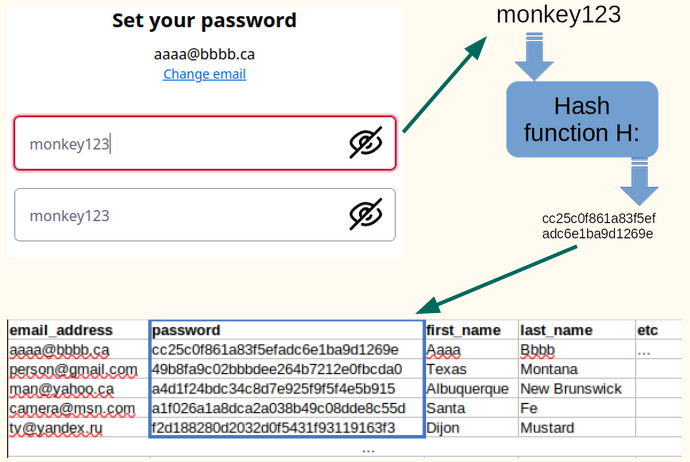

This is done for security. It's not possible to authenticate using the hash digest saved in the user database. If you tried, the website would be hashing a hashed password, which produces some other, entirely different, digest. The result would not match to any entry in the user database.  

Further, cryptographic hashes are very difficult to reverse. Should an attacker get their hands on a user database of email addresses and hashed passwords, they've still got a difficult task ahead of them before they can start trying to log in to websites using these stolen credentials.

# Can hashes be reversed?

Above, we said "cryptographic hashes are *very difficult* to reverse," but it's not impossible. ***Brute force*** is a very common way to try to reverse the digests produced by a cryptographic hash. The brute force technique simply generates every possible key from a key space, applies the correct hash algorithm, and checks to see if the digest generated matches their target hash. In an attacker scenario, the "target hash" would be a digest saved in the user database.

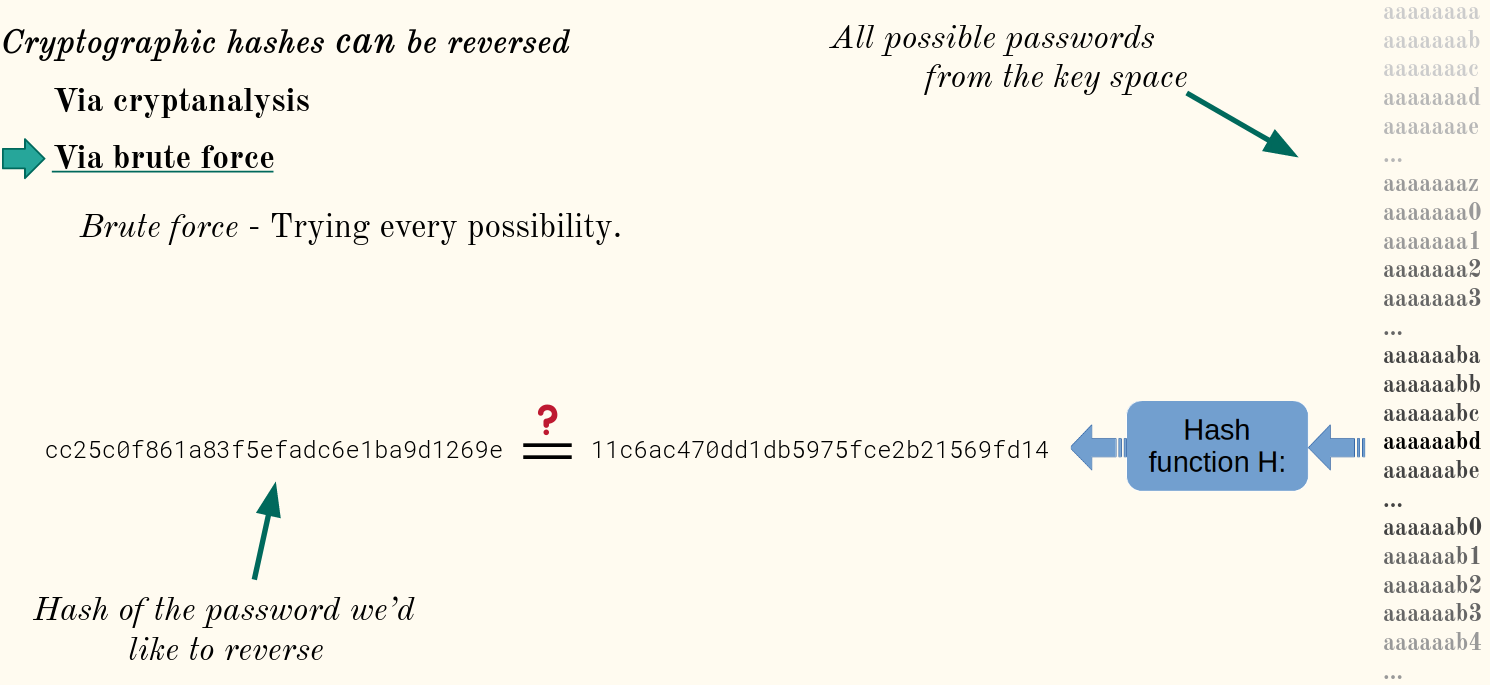

When the attacker has found a plain text key that, when hashed, produces a digest matching their target digest, they have found a "collision." Most likely, they've come across the user's password, but that doesn't need to be the case! Given a large enough key space, it may be that two or more keys will cause a hash algorithm to produce colliding digests.

With a key that, once hashed, produces a digest matching the one stored in the user database, the attacker can now log in as the targetted user.

## Reverse hash digests of two-digit PINs

Can you reverse the following hash digests, generated from a key space of 2 digits, zero through nine?
<table>
  <thead>
    <tr>
      <th>Hash digest</th>
      <th>Hash algorithm</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>751d31</td>
      <td>Shorty hash</td>
    </tr>
    <tr>
      <td>3c59dc</td>
      <td>Shorty hash</td>
    </tr>
    <tr>
      <td>2a38a4a9316c49e5a833517c45d31070</td>
      <td>MD5</td>
    </tr>
    <tr>
      <td>92cfceb39d57d914ed8b14d0e37643de0797ae56</td>
      <td>sha1</td>
    </tr>
    <tr>
      <td>c0c7c76d30bd3dcaefc96f40275bdc0a</td>
      <td>???<br />Does this look similar hash digests you've seen before?</td>
    </tr>
  </tbody>
</table>

In [ ]:
from Hash_Widgets import reverse_PIN_display
reverse_PIN_display()

*Careful!* If you run through the numbers too quickly some might be skipped.  

**When reversing the hash digest of a PIN:**
1. Does the length of the hash digest make reversing the digest any harder?
    1. If the length of the digest doesn't make reversing it any harder, why are longer digests considered more secure? (See the appendix for an answer!)
2. How successful would you be at reversing these hashes if you weren't told the hashing algorithm used?
3. Would your technique for reversing these hashes be any different if you were told the favourite numbers of the people who set the PINs?

## Reversing hash digests of longer keys

The widget below will attempt to reverse hash digests that were generated from larger key spaces.
<hr />

**Instructions:**
1. *Define a key space* - In the first tab, start on the smaller side (< 50 million?) or stick to the key space parameters from the table.
2. *Define the hash search* - In the second tab, select the hash algorithm to use, the target digests (one per line), and select how you'd like to search the key space. Once done, click "Set selection".
    1. This is a good time to use the hashing widget from the previous notebook (`Starting_Notebook.ipynb`). Use this widget to generate the hashes, then try to reverse them below.
3. After clicking "Set selection" you should see...
TODO: I'm planning to modify how this works, so, I'll fill this in later.


***Warning! #1:* Lower your expectations!**  
*This will not reverse hash digests generated by a key of any reasonble strength. It will also not operate on key spaces of any reasonable size.* Having said that, you can't hurt anything here by trying. If you get too ambitious in your search, you'll either get tired of waiting, or Python will be killed by the server and you'll have to restart your Jupyter kernel.  

***Warning! #2:* Know how to check the status of your Python kernel!**  
Depending on the size of the key space you're searching, output is unlikely to be immediate. You can see if the Python kernel is busy searching by looking at the kernel status on the lower JupyterLab status bar. It'll look like this: 

If it says "Idle," then there's some other reason you're not seeing any output. If it says "Busy" you can wait some more, or kill the kernel by pressing the "Stop" button on the toolbar, above.
<hr />

Can you reverse the following hash digests? The further down on the table, the harder they are to reverse. Anything not explicitly stated will be up to you to figure out.
<table>
  <thead>
    <tr>
      <th>Hash digest</th>
      <th>Hash algorithm</th>
      <th>Key space parameters</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>17d63b</td>
      <td>Shorty hash</td>
      <td>Key length: 3, Chars: [0-9]</td>
    </tr>
    <tr>
      <td>2d4027d6df9c0256b8d4474ce88f8c88</td>
      <td>MD5</td>
      <td>Key length: 5 or less, Chars: [0-9]</td>
    </tr>
    <tr>
      <td>8b1a9953c4611296a827abf8c47804d7</td>
      <td>MD5</td>
      <td>Key length: 5, Chars: [a-z], [A-Z]</td>
    </tr>
    <tr>
      <td>44897a386c513c7495bd713032f4dc5fa0ca42ca</td>
      <td>SHA1</td>
      <td>Key length: 5, Chars: [a-z], [0-9]</td>
    </tr>
  </tbody>
</table>

In [ ]:
from Hash_Search_Widgets import hs_display
hs_display()

## Do you have lots of time, or lots of memory?

TODO: Again, planning to change how this works.  
You'll note that the search widget above had two options for searching your defined key space:  
***'Generate each possible key one-at-a-time, hash, and compare to target digest'***
* *Pros:*
    * Using this method, you don't generate any more keys than is necessary, since as soon as a match is found for your target digest(s), the search stops. Assuming the keys you're looking for are randomly distributed across the key space, you should *on average* only have to search half the key space before a matching digest is found.
    * Memory requirements are minimal, since you're only generating and comparing one key:digest pair at a time.
* *Con:*
    * None of the work creating key:digest pairs is being saved. The exact same operations are performed every time you search the key space.
    
***'Generate and hash entire key space, save to table, then search'***
* *Pro:*
    * You only have to generate and hash the key space once, after which you can search for as many key:digest pairs as you want at high speed.
* *Cons:*
    * Primarily, the fact that you have limited memory (or disk) space on which to store the computed key:digest pairs.

***Things to consider while reversing hashes:***
1. Above, where we were reversing the hashes of two digit PINs, it was suggested that it was equally difficult to reverse long hashes as it was short hashes. Now that we're operating on larger key spaces, is this still true?
    1. Check the time estimates for the hashing algorithms MD5 and `shake_128`, keeping the key space size the same.
    2. What might cause differences in search time estimates?

## What a saved table of key:digest values might look like

What you may have noticed above was that searching for keys was a lot faster if you took the time to first generate and save a hash table. In the code for this notebook, these key:digest pairs were saved to a `dict()` (for "dictionary") - a built-in Python data structure. Running the code cell below will display 20 key:digest pairs from your defined key space.

In [ ]:
from RainbowTables import HashSearch
hashsearch = HashSearch(ks_get_keyspace(), 'md5')
hashsearch.save_hashed_keyspace(size = 20)
for key, digest in hashsearch.key_hash_dict.items():
    print(f'{key}: {digest}')

I can't speak to the speed of searching a `dict()` compared to other data structures, but it doesn't appear to be very space efficient.

The analysis, design, and use of efficient data structures is an entire computer science topic of its own. Certainly, large gains in speed and storage efficiency could be achieved here. However, the point I'm going to try to make is that - *even still* - the enourmous amount of space a table of key:digest pairs would require is unworkable, even with an unlimited budget for hardware.

# (Almost to) Rainbow Tables

*We're going to have to do exactly two things here that aren't going to make much sense right away:*
1. Talk about something called a *reduction function*, and 
2. Create chains of keys and hash digests using that reduction function.

If you'll just ignore that voice in the back of your head that's going "but WHHHY?" for a minute, hopefully we can get to the point where it all comes together.

## Creating a Rainbow Table requires a reduction function

A reduction function acts like a hashing algorithm, but in reverse. It takes a hash digest as input, and provides as output a key that exists in the target key space. Like a hashing algorithm, it is deterministic, meaning that the same input will always result in the same output.  
It's important to note that ***a reduction function is not reversing the hash digest!***

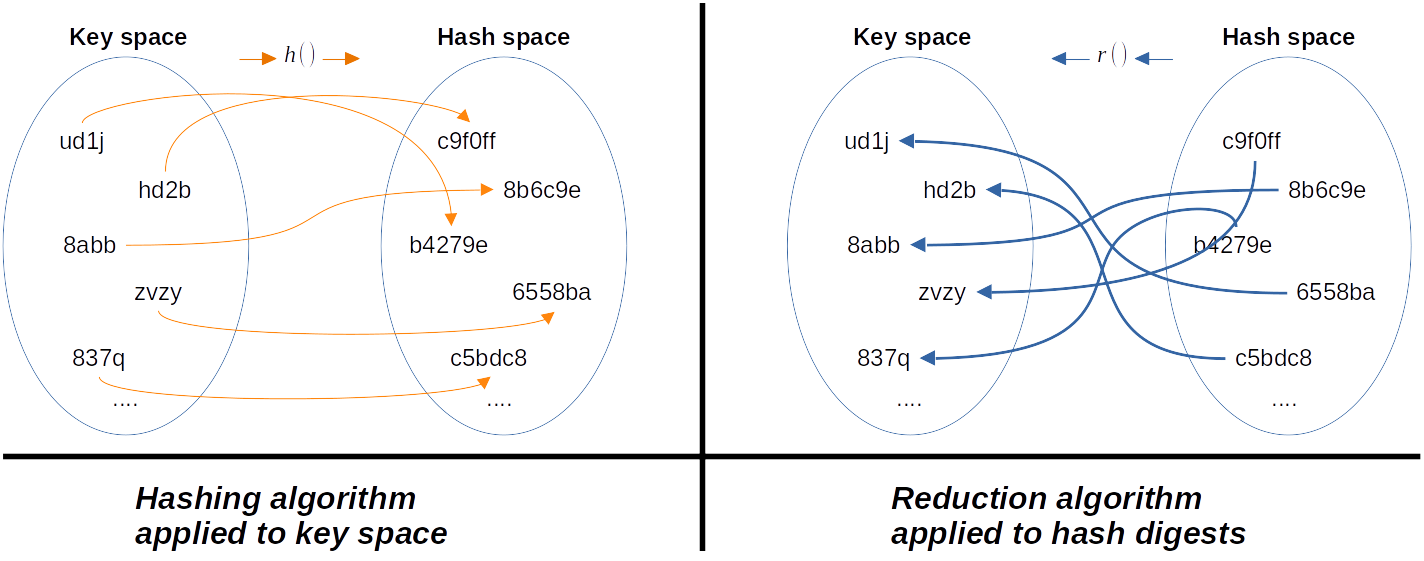

***On the left...*** is a graphical representation of a hashing algorithm being applied to keys in a key space, "mapping" those keys to hash digests.

***On the right...*** the process is going the other way, with a "reduction function" mapping hash digests to keys in the target key space.

***What makes a good reduction function?***
* The ideal reduction function will map hash digests to keys in the key space that are evenly spread across the target key space.
    * As an example, a poor reduction function would map all hash digests that start with 'A' to keys that start with the letter 'k'.
* The idea of "randomness" is how we judge how good a reduction (and hash) function is at evenly covering an entire range of valid values.
* We'll talk about this more below, where we discuss the problem of hash collisions.

## The reduction function allows for the creation of "key -> digest -> key" chains

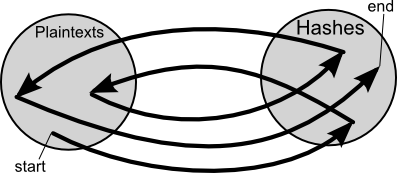

*[Image source](https://kestas.kuliukas.com/RainbowTables/)*

*From the previous section, we know:*
1. The hash function maps valid keys to valid hash digests.
2. The reduction function maps valid hash digests to valid keys.


Now, if both the hash and reduction function are written well, we should be able to repeat this process many times without encountering a duplicate key or hash. In doing so, we create a **chain** of `key:digest` pairs.

In [ ]:
from HashReductionChain_Widgets import hash_reduce_chain_display
hash_reduce_chain_display()

***Using the above widget:***
1. Click the buttons in order, from left to right.
2. *"Generate key"* - A key is generated from your defined key space
3. *"Use this hash algo."* - The selected hash algorithm is used to hash the generated key.
4. *"Apply reduction"* - A hash reduction function, which we haven't looked at yet, take the generated hash digest and maps it back to a key valid for your key space.
5. Copy that new key, paste it into the beginning field, then start again at step 3.


*What is happening here?*
* You're (manually) creating a chain of key -> hash digest values.

## A table of 10 chains, and an unusual method for searching

Once you execute the below cell you'll see a table of key:digest pairs that is *very nearly* a true "Rainbow Table." It consists of 10 rows of chains, with each chain having 5 key:digest pairs. Each chain was generated in the same way you were doing above: Starting with a randomly generated key from your defined key space, then repeated applications of the reduction, then hashing function.  

Just above the table are Jupyter widgets to help search the table for hash digests. Very broadly speaking, this is the algorithm for searching this table:

**Starting with a target hash digest you'd like to know the original key for, _two phases_ are followed:**
1. *Moving from right-to-left:* Iterations of reducing a digest to a key, hashing that key to a digest, then checking if that digest is in the last column of this table. Once a digest is generated that matches a digest in the last row...
2. *Moving from left-to-right:* Take the starting key from the chain that matched a hash digest you generated from step 1. Hash this key, reduce the resulting digest, and repeat until you encounter your original target hash.
3. Profit!

*(There are step-by-step instructions below)*

In [ ]:
from RB_Table_Search import display_rb_table, display_table_search
from RB_Table_Help import display_table_help

display_table_search()
display_rb_table()

### Help searching the Rainbow table

#### Step-by-step

We're going to walk through the steps of how we can search through this table (it'll become more clear why we're doing this a little later).

***Right-to-left digest search:***
1. Copy a hash digest from the middle of the table and paste it into the field "Key/digest to start your search from".
    1. We're going to pretend this is the target digest you want to find the original key for.
2. The "Reduce/Hash iterations" field represents how many times a "reduce/hash" cycle will be applied to your target digest. Once that number of iterations have been performed we attempt to look up the resulting digest in the last column of the table.
2. Click "Search" once
3. Your target hash is printed in the 9th column. Assuming the target digest doesn't match any of the digests in the 9th column, nothing more should happen.
4. Click "Search" again. Now, your target digest is reduced, hashed, the the resulting digest is checked against the hashes in the 9th column again.
5. As you continue clicking "Search," your target digest is reduced/hashed an increasing number of times, and every time the final result is checked against the digests in the 9th column.
6. Eventually, assuming you picked a hash from this table, a matching hash should be found. Hurray! You'll know when you found it because the matching hash digests will be highlighted (this isn't or target digest, however).


***Left-to-right key search:***
1. Copy the key in column '0' that belongs to the same chain as the highlighted matching digest found from the previous steps (this will be in one of rows 1-10).
2. Paste this key into the "Key/digest to start your search from" field on the left, and change the radio button to "Start from key (Left-to-right)
3. As before, the "Reduce/Hash iterations" field represents how many times a "reduce/hash" cycle will be applied. However, this time it's a "hash/reduce" cycle because we're starting with a key.
4. Click "Search" once
5. The starting key is hashed once and the key:digest pair printed in columns 0 and 1.
6. Click "Search" again. 
7. TODO: I'm planning to change how this works. Starting hash should now be highlighted.

#### Annotated screenshots to explain a bit better.

In [ ]:
display_table_help()

## Is this table of chains any better than a full key:digest table?

No, it's much worse. It requires all the processing power and storage space of a full hash table, requires this bizarre searching method of reduce/hash cycles, but also runs the risk of not producing every possible key:digest pair. So why did we go to all this effort?

By creating chains of key:digest pairs and searching in the way we did above, *we can drop the entire centre of this table*!

In [ ]:
# TODO: Show table with center dropped here...

* The table we search above has 10 rows, each with 5 key:digest pairs, for a total of 50 key:digest pairs.
* Dropping the centre of this table takes us from needing to store 50 key:digest pairs to only 10 - **An 80% space savings!**

***Can we REALLY still find the information we dropped?***  
We've already done it. Go back to the table search widget above and search for more hashes. But this time, use the "Blackout center of table" button to pretend the middle section of the table is gone. You'll find that you don't need to know anything about the contents of the middle of those chains.

## A space-time trade-off

This is an example of a space-time trade-off -
* Searching a pre-computed table of key:digest pairs is much faster than computing each pair every time you try to search for a hash digest. But, saving such a table requires an incredible about of memory and/or disk space.
* On the other hand, generating and hashing keys as you search requires next to no memory or disk space, but it takes a lot of time, especially if you're going to do it more than once.

A Rainbow Table helps you to trade some of one for a little of the other - if you're willing to use more memory, you can reduce the amount of time taken to search. Or, if you're willing to wait a little longer, you can use less memory. We adjust this trade-off by manipulating how long the chains of the table are, and thanks to the cleverness of Rainbow Tables, it doesn't matter whether the chains are 5 pairs long or 1000, we can still drop every column except the first (which contains a key) and the last (which contains a digest). Above, our chains were 5 pairs long and that provided an 80% space savings. However, (ignoring some pretty big catches) we could have made chains 100 key:digest pairs long, providing a 100:1 space savings, or a 99% reduction.

This space savings it at the expense of time, since the longer the chain, the longer it takes to perform the necessary hash/reduction iterations.

# The challenge of hash collisions

Above, we said that the ideal reduction function would map digests from the hash space evenly across keys from the target key space. A good cryptographic hash function does the same thing, mapping input to hash digests, evenly distributed across the hash space. While cryptographic hash functions have the benefit of being designed by cryptographers and mathematicians, it's unlikely we'll be able to design our own reduction functions to cover a key space so evenly.

To try to better understand what we mean by mapping digests to keys evenly accross a target space, consider the following charts:

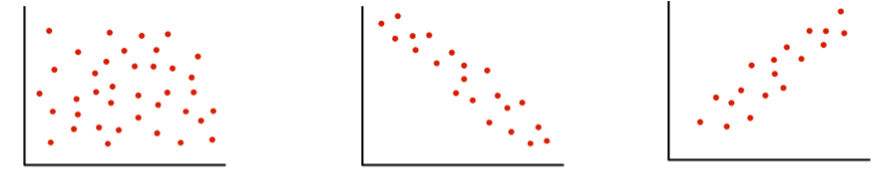

We're looking at three XY-planes. Lets pretend that each plane represents the same key space - all the possible keys for a key space can be located on the plane, given that we have the correct XY-coordinates. The red dots will be keys in the key space that some reduction function mapped a hash digest back to.

**To review:** Each chart here is the same key space, but each shows the use of a different reduction function used to map to keys.

Charts two and three, then, are examples of reduction functions that are doing a poor job of producing keys evenly distributed over the entire key space. On the third chart, for example, keys that exist in the upper-left or lower-right aren't getting mapped to.  

By contrast, the first chart shows a reduction function that's producing keys from across the entirety of the key space. We can imagine that a key located any where on this chart would have an equal chance of being "mapped to" by this reduction function.

So imagine we're mapping 1 billion hash digests to the key space represented in these three charts. Which reduction function do you think will produce the least number of hash collisions?

## When chains collide

*Even if* we had crafted the ideal reduction function, the risk of key collisions still exists. A hash space that contains more possible hash digests than the corresponding key space has keys will, out of necessity, have to map some digests to the same key. However, even if there were more keys than hash digests, because of how randomness works it's certain that two or more hashes will still lead to the same key (in the same way a coin flip has a 50/50 chance of being heads or tails, yet it's still possible to get streaks of all tails).

I still haven't explained what's wrong with chain collisions, but the table below will hopefully demonstrate. This table is built using an exceptionally bad reduction function. As a result, any given hash digest, when reduced, is fairly likely to generate a duplicate plain text key. Aside from this tweak the below table is just like the table we worked with above.

In [ ]:
from RB_Table_Search import display_bad_reduction_table
display_bad_reduction_table()

Highlighted keys are keys that have shown up in the table more than once.

**If you don't see any highlighted cells**, try re-runing the previous cell to generate a new table.  


***Questions to think about:***
* For the duplicate keys, were they produced by reducing the same hash digest, or a different one?
* For two chains that produce the same key, is it possible for those chains to diverge again?
* What kind of impact does encountering a duplicate key have on the number of unique key:digest pairs in the entire table?

**Example:**  
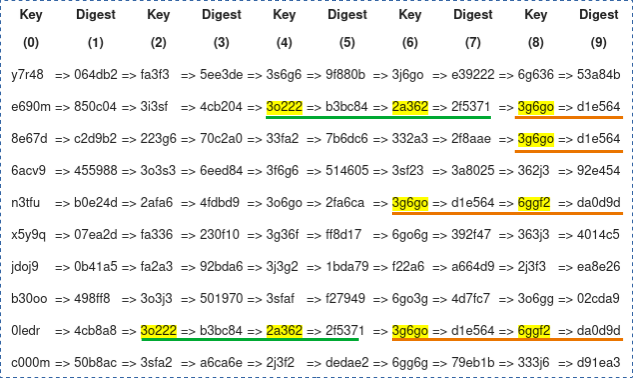

As you can see in the above example, chains that contain duplicate keys "converge", producing identical output starting from the duplicate key and on. The key `3g6go`, for instance, appears in four different chains. For each chain, once that key is reached, all later output is identical. 

## Loops in a chain

In a chain, a loop occurs when the same key:digest pair keeps reoccuring. The longer a chain is, the more likely a loop is to be encountered. To demonstrate this, here is a made up example:

<table>
   <tr>
      <th>Key<br />(0)</th>
      <th></th>
      <th>Digest<br />(1)</th>
      <th></th>
      <th>Key<br />(2)</th>
      <th></th>
      <th>Digest<br />(3)</th>
      <th></th>
      <th>Key<br />(4)</th>
      <th></th>
      <th>Digest<br />(5)</th>
      <th></th>
      <th>Key<br />(6)</th>
      <th></th>
      <th>Digest<br />(7)</th>
      <th></th>
      <th>Key<br />(8)</th>
      <th></th>
      <th>Digest<br />(9)</th>
   </tr>
   <tr>
       <td><span style="background-color: yellow;">8r53c</span></td>
      <td>=></td>
      <td>27e706</td>
      <td>=></td>
      <td>wowwc</td>
      <td>=></td>
      <td>155aad</td>
      <td>=></td>
       <td><span style="background-color: yellow;">8r53c</span></td>
      <td>=></td>
      <td>27e706</td>
      <td>=></td>
      <td>wowwc</td>
      <td>=></td>
      <td>155aad</td>
      <td>=></td>
       <td><span style="background-color: yellow;">8r53c</span></td>
      <td>=></td>
      <td>27e706</td>
   </tr>
</table>

Just as with the collision example above, once the key `8r53c` is reached no new information is added to chain, it's just a repetition of the same key:digest pairs.

## Why are collisions and loops a problems?

To ensure we can always find the plain text key for a particular hash digest, we need our Rainbow Table to contain all possible keys from the target key space. However, as we search a Rainbow Table by following chains, collisions and loops act as dead ends.

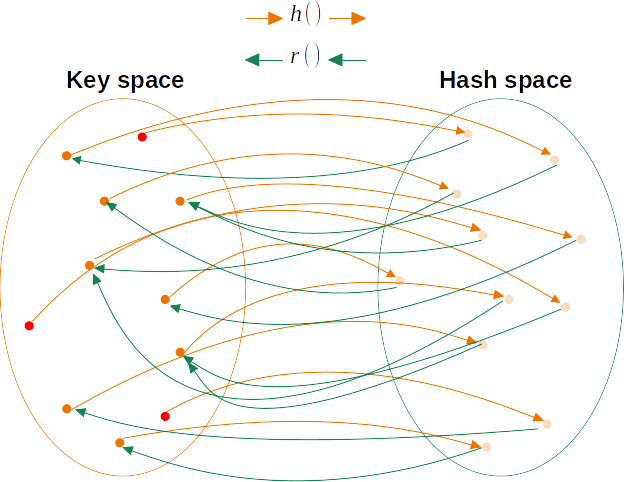

In the above image, hashing function $h()$ (operating left-to-right) maps key values to hash digest values, while reduction function $r()$ (operating right-to-left) maps hash digests back to key values. But notice two things:  
1. *There are orange dots (keys) in the key space with two green arrows pointing to them from the reduction function (mapping digests to keys).*
    1. This is a graphical representation of a hash collision. The reduction function is mapping two different hash digests back to the same key.

1. *The red dots (keys) in the key space that don't have any green arrows pointing to them from the reduction function.*
    1. This is a graphical representation of the *result* of a hash collision. Keys that aren't mapped back to by the reduction function are likely to be absent from any Rainbow Table, meaning they (and their corresponding hash digest) can't be found in the table.
    
***The problems with collisions are:***
* The greater the number of collisions, the greater the number of keys from the key space that can't be found in our generated Rainbow Table.
* The greater the number of collisions, the more redundant information (key:digest pairs) our table will hold, reducing the space *and time* efficiency of our Rainbow Table.

***The problems with loops are very similar***  
* Loops can prevent key:digest pairs from being represented in our Rainbow Table since the cycling between the same key(s) and digest(s) means some key value may never be generated.
* Our Rainbow Table is less efficient since redundant information is held in table chains.

# The tweak that promotes us to a proper "Rainbow Table"

Consider this screenshot of the table that used the terrible reduction function:

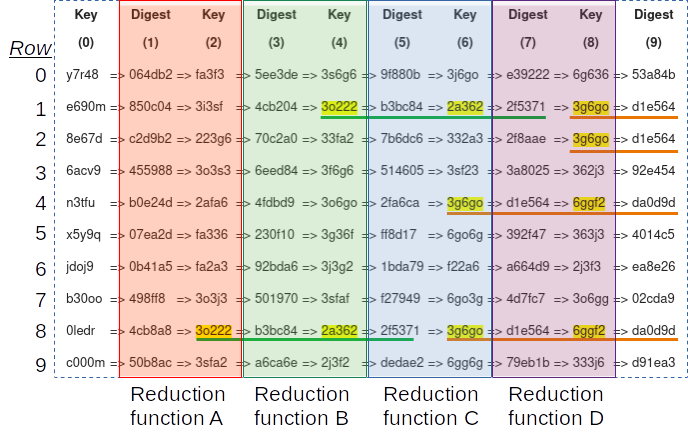

This table suffers from the problem of "duplicate keys mean duplicate chain sections." For example, when a chain generates (or "comes across," depending on how you want to think of it) the key `3o222`, all subsequent key:digest pairs will be identical. We're not saying the entire chain is identical, just that the key:digest pairs following the common key will now be identical.


What makes a Rainbow Table and Rainbow Table is the attempt to mitigate the problem of collisions and loops by applying a different reduction function at each step of the chain generation process (a "step" being a reduction/hash iteration). This small tweak greatly reduces the chance that there will be chains that converge.

***What if different reduction functions were used at each step of the chain generation?***  
Lets focus only on the duplicate key 3o222, in rows 1 and 8 only:

<table>
   <tr>
       <th></th>
      <th>Key<br />(0)</th>
      <th></th>
      <th style="background-color: #FFBC8A;">Digest<br />(1)</th>
      <th style="background-color: #FFBC8A;"></th>
      <th style="background-color: #FFBC8A;">Key<br />(2)</th>
      <th></th>
      <th style="background-color: lightgreen;">Digest<br />(3)</th>
      <th style="background-color: lightgreen;"></th>
      <th style="background-color: lightgreen;">Key<br />(4)</th>
      <th></th>
      <th style="background-color: lightblue;">Digest<br />(5)</th>
      <th style="background-color: lightblue;"></th>
      <th style="background-color: lightblue;">Key<br />(6)</th>
      <th></th>
      <th style="background-color: #B4A7D6;">Digest<br />(7)</th>
      <th style="background-color: #B4A7D6;"></th>
      <th style="background-color: #B4A7D6;">Key<br />(8)</th>
      <th></th>
      <th>Digest<br />(9)</th>
   </tr>
   <tr>
       <td><b>Row 1</b></td>
       <td>...</td>
      <td>=></td>
      <td style="background-color: #FFBC8A;">...</td>
      <td style="background-color: #FFBC8A;">=></td>
      <td style="background-color: #FFBC8A;">...</td>
      <td>=></td>
      <td style="background-color: lightgreen;">4cb204</td>
      <td style="background-color: lightgreen;">=></td>
       <td style="background-color: lightgreen;"><span style="background-color: yellow;">3o222</span></td>
      <td>=></td>
      <td style="background-color: lightblue;">...</td>
      <td style="background-color: lightblue;">=></td>
      <td style="background-color: lightblue;">...</td>
      <td>=></td>
      <td style="background-color: #B4A7D6;">...</td>
      <td style="background-color: #B4A7D6;">=></td>
       <td style="background-color: #B4A7D6;">...</td>
      <td>=></td>
      <td>...</td>
   </tr>
   <tr>
       <td><b>Row 8</b></td>
       <td>...</td>
      <td>=></td>
      <td style="background-color: #FFBC8A;">`4cb8a8`</td>
      <td style="background-color: #FFBC8A;">=></td>
       <td style="background-color: #FFBC8A;"><span style="background-color: yellow;">3o222</span></td>
      <td>=></td>
      <td style="background-color: lightgreen;">...</td>
      <td style="background-color: lightgreen;">=></td>
       <td style="background-color: lightgreen;">...</td>
      <td>=></td>
      <td style="background-color: lightblue;">...</td>
      <td style="background-color: lightblue;">=></td>
      <td style="background-color: lightblue;">...</td>
      <td>=></td>
      <td style="background-color: #B4A7D6;">...</td>
      <td style="background-color: #B4A7D6;">=></td>
       <td style="background-color: #B4A7D6;">...</td>
      <td>=></td>
      <td>...</td>
   </tr>
</table>

It's reasonable to expect that two different reduction functions are still going to produce the same key sometimes. But it's what happens next that makes the difference:

<table>
   <tr>
       <th></th>
      <th>Key<br />(0)</th>
      <th></th>
      <th style="background-color: #FFBC8A;">Digest<br />(1)</th>
      <th style="background-color: #FFBC8A;"></th>
      <th style="background-color: #FFBC8A;">Key<br />(2)</th>
      <th></th>
      <th style="background-color: lightgreen;">Digest<br />(3)</th>
      <th style="background-color: lightgreen;"></th>
      <th style="background-color: lightgreen;">Key<br />(4)</th>
      <th></th>
      <th style="background-color: lightblue;">Digest<br />(5)</th>
      <th style="background-color: lightblue;"></th>
      <th style="background-color: lightblue;">Key<br />(6)</th>
      <th></th>
      <th style="background-color: #B4A7D6;">Digest<br />(7)</th>
      <th style="background-color: #B4A7D6;"></th>
      <th style="background-color: #B4A7D6;">Key<br />(8)</th>
      <th></th>
      <th>Digest<br />(9)</th>
   </tr>
   <tr>
       <td><b>Row 1</b></td>
       <td>...</td>
      <td>=></td>
      <td style="background-color: #FFBC8A;">...</td>
      <td style="background-color: #FFBC8A;">=></td>
      <td style="background-color: #FFBC8A;">...</td>
      <td>=></td>
      <td style="background-color: lightgreen;">4cb204</td>
      <td style="background-color: lightgreen;">=></td>
       <td style="background-color: lightgreen;"><span style="background-color: yellow;">3o222</span></td>
      <td>=></td>
      <td style="background-color: lightblue;"><b><i>c00mn</i></b></td>
      <td style="background-color: lightblue;">=></td>
      <td style="background-color: lightblue;">...</td>
      <td>=></td>
      <td style="background-color: #B4A7D6;">...</td>
      <td style="background-color: #B4A7D6;">=></td>
       <td style="background-color: #B4A7D6;">...</td>
      <td>=></td>
      <td>...</td>
   </tr>
   <tr>
       <td><b>Row 8</b></td>
       <td>...</td>
      <td>=></td>
      <td style="background-color: #FFBC8A;">`4cb8a8`</td>
      <td style="background-color: #FFBC8A;">=></td>
       <td style="background-color: #FFBC8A;"><span style="background-color: yellow;">3o222</span></td>
      <td>=></td>
       <td style="background-color: lightgreen;"><b><i>1e50b</i></b></td>
      <td style="background-color: lightgreen;">=></td>
       <td style="background-color: lightgreen;">...</td>
      <td>=></td>
      <td style="background-color: lightblue;">...</td>
      <td style="background-color: lightblue;">=></td>
      <td style="background-color: lightblue;">...</td>
      <td>=></td>
      <td style="background-color: #B4A7D6;">...</td>
      <td style="background-color: #B4A7D6;">=></td>
       <td style="background-color: #B4A7D6;">...</td>
      <td>=></td>
      <td>...</td>
   </tr>
</table>

Now with a different reduction function used at each step in the chain generation, the chains diverge again! The only way chains can merge now is if two different hash digests reduce to the same key *in the same column*. This is much less likely to occur than if we were using the same reduction function for an entire chain.  

Thinking of this intuitively - Under a single reduction function, a Rainbow Table of 1 million key:digest pairs has 1 million different chances of encountering a key collision that will lead to converging chains. However, a table of the same size built with 4 different reduction functions only has $\frac{1}{4} \times 1,000,000 = 250,000$ chances to encounter a key collision.

***So what makes a "proper Rainbow Table"?***  
A table of key -> digest -> key chains, generated by using a unique reduction function at each reduce/hash step.

## Creating lots of reduction functions

It might sound like a lot of work to create a different reduction function for every column (digest:key pair), especially when chains can be 100s of pairs long. As an example to show that creating unique reduction functions doesn't have to be that hard, here is the function used to generate chains in the table above (that non-terrible one table):

```python
def hash_reduce(hash_digest, salt, key_length, allowable_chars):
    # The hash string is converted into its underlying 1s and 0s.
    # `hash_in_binary` is where that information will be stored.
    hash_in_binary = str()

    # Go through each character of the hash digest string, converting each to
    # its 8-bit binary representation, and appending it to one long binary
    # string (`hash_in_binary`)
    for c in hash_digest:
        # * `ord(c)` converts the string representation of one character in the
        # hash digest into a Unicode character number.
        # 
        # * `bin(...)[2:]` will convert that number into binary, taking off the
        # first two characters which aren't part of the actual binary number
        # 
        # `.zfill(8)` will ensure the binary string that results is 8 digits
        # long, as it fills any empty places after the conversion of the
        # character to binary with 0s.
        hash_in_binary += bin(ord(c))[2:].zfill(8)

    # We're breaking the long binary string into semi-evenly-sized chunks. The
    # chunk size is based on the target key length for the plain text key we've
    # been asked to generate.
    binary_chunks = int(len(hash_in_binary)/key_length)
    
    # `key_from_hash` is the string where we'll be building the plain text key
    key_from_hash = str()
    
    # We use the binary representation of the hash digest (which we built
    # above) to select each character for the plain text key generated.
    
    # For each character position the plain text key must have, figure out
    # slices of the the binary-represented digest to be used to select a valid
    # character.
    for i in range(0, key_length):
        # The left bound of the `hash_in_binary` binary string that we're going
        # to draw from.
        left_bound = i*binary_chunks
        
        # The right bound
        right_bound = (i+1)*binary_chunks
        
        # If we're generating the last character of the plain text key, use
        # whatever binary digits are between `left_bound` and the end of the
        # hash digest binary representation. This is to compensate for binary
        # strings that can't be evenly divided by the desired plain text key
        # length.
        if i == (key_length-1):
            right_bound = len(hash_in_binary)
        
        # `int(...)` takes the slice of binary we've pulled out, and converts
        # in back into the recognizable base-10 representation.
        # 
        # `%len(allowable_chars)` - `%` is the modulo operation, which is best
        # explained elsewhere. What's happening here is we're making sure we're
        # generating a list position (`list_pos`) for `allowable_chars` that is
        # valid. For example, if there are only 10 allowable characters we
        # can't be trying to reference the 23rd character of the list.
        list_pos = (
            int(hash_in_binary[left_bound:right_bound], 2) + salt
        ) % len(allowable_chars)
        
        # Using the list position generated above, select an allowable char
        # and add it to the plain text key being generated.
        key_from_hash += allowable_chars[list_pos]
        
    return key_from_hash
```

One of the parameters this function accepts is the integer `salt`:
```python
def hash_reduce(hash_digest, salt, key_length, allowable_chars):
    ...
```

For each digest:key pair in a Rainbow Table `salt` can be incremented by 1, and in doing so, we slightly change the output of the reduction function:
```python
...
        list_pos = (
            int(hash_in_binary[left_bound:right_bound], 2) + salt
        ) % len(allowable_chars)
...
```

This is just one example of how a person could easily make many unique reduction functions. What's important is that the reduction functions are used consistently, depending on the step in the hash:key chain. Across all chains, column 5 (as an example) should always use the same reduction function. This is necessary in order to search chains later on. If our search code doesn't know which reduction function to apply at place '5', then it won't be able to recreate the chain. If it can't recreate the chain, then we've lost all the key:digest pairs we worked so hard to generate.

# But it's all for naught - Rainbow Tables aren't very useful anymore

Let us count the reasons why...

## 1. Salted hashes

When you sign up for a new account at a website it's nearly guaranteed that you provide other information - like an email address or your name. 

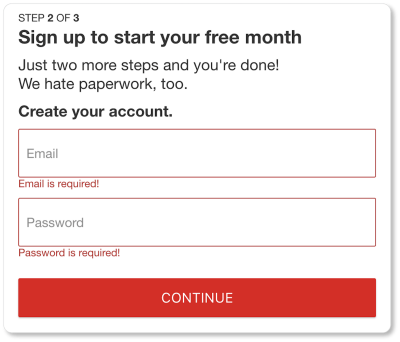

Earlier, we said that when you sign up for an account your password will be taken, hashed, then saved. The website/company stores the hash and doesn't keep the password.  

What if... before hashing your password they appended your email address to the password. So you create your account with:
* *Email:* `best@monkey.com`
* *Password:* `monkey123`

But the website creates your hashed password like this:
```
monkey123best@monkey.com -> Hash algorithm (MD5, in this example) ->
  af50db2dac4a9fe16e8c23ffe8ae956f
```

Just like before, your plain text password is thrown away and only a hash digest is kept. Can they still authenticate you when you come back and provide your email address and password? For sure! They just have to remember that their standard operating procedure is to put together email address and password first before hashing.

***How does this thwart a Rainbow Table?***  
Remember that the value of a Rainbow Table is that one can speed up hash look-ups by precomputing key:digest pairs. This is made feasible by the time-space trade-off a Rainbow Table allows. Lets think about how we would try to create a Rainbow Table to reverse hashes if every hash we wanted to reverse was prepended with an email address.

A user database:

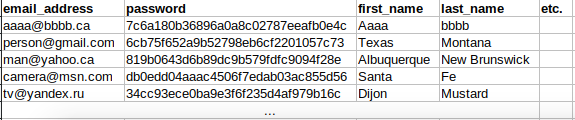

Given what this website allows for passwords, lets say the password key space is:
```
Key size: 10
Number of allowable characters: 36
Keys smaller than '10' allowed? True
Size of resulting key space: 3,760,620,109,779,060
```

Lets also pretend that the hash function used my this website is MD5, and that "Texas Montana's" password is 'texas'.

Generating key:digest pairs like we did before, it's likely we'll generate the pair: `texas:3e194b5730ed8b868224b80ac8d7eed9`.

But this doesn't match Texas Montana's password digest, because the key that generated that digest was `texasperson@gmail.com`.

The attacker knows this, so, lets say the attacker generates key:digest pairs for every key in the password key space *but this time* they prepend each generated key with the email address `person@gmail.com`. Clever!

As expected, after a very very long wait, this attacker has a Rainbow Table that contains the key `texasperson@gmail.com:6cb75f652a9b...`. So the attacker can now take Texas Montana's password hash and look up the original key. Success!

Next, on to Albuquerque New Brunswick's password! Uh oh... It's guaranteed that the table the attacker just put all that effort into creating isn't going to contain Albuquerque's password, because whatever his password is, we know it ended with `man@yahoo.ca`, and our Rainbow Table certainly didn't generate keys that ended with that text.

What's happened here? By salting hashes in this way the benefit of pre-computing hashes has been destroyed. With a user database like the one above, an attacker would have to generate all new tables for each user. Or, create tables so astronomically large that through sheer brute force, keys that end with characters like `man@yahoo.ca` *and* `person@gmail.com` *and* `aaaa@bbbb.ca`, etc. happen to be generated. As we'll see next, that's just not possible.

## 2. Combinatorics

A good password will belong to a key space that's so huge that, even with the space savings of a Rainbow Table, it still can't possible be computed or stored. Lets consider a password of 10 characters, containing upper- and lower-case characters, numbers, and special characters.

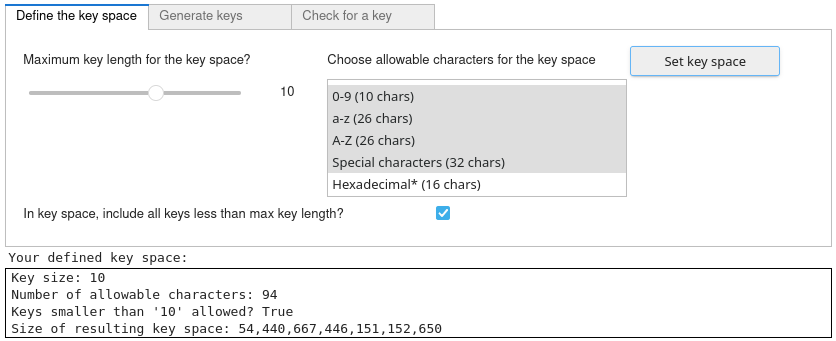

That's a key space of over 54 quintillion possible passwords. Lets do some math!  

TODO:

Disk space to hold 54 quintillion passwords and their 20 byte hash digests (the size on an SHA-1 digest): 1,469,367,938.5 terabytes, or 1.4 exabytes.


A key:digest pair will be <10 bytes>:<20 bytes>, so, 30 bytes per pair.  
A Rainbow Table with chain lengths of 100 pairs each will take $30 \times 100 = 3,000$ bytes and compress that information down to 30 bytes. So, we're reduced the size of the chain by 99%.  

At the table level, then, a table of 1,469,367,938.5 terabytes would be reduced to 14,693,679.385 terabytes. Much smaller, for sure, but in real world terms, this much data is unmanageable.
http://coststorage.com/

Storage 
https://www.anandtech.com/show/16544/seagates-roadmap-120-tb-hdds
50TB HDs
293873.587700000 hard drives


## 3. Key derivation functions

A key derivation function is very much like a cryptographic hash, and the difference between the two mostly comes down to how the output of the function is used. For our purposes here, a key derivation function is used to make hashed passwords slower to compute and in doing so, makes them more difficult to reverse.

To try to explain this, lets invent a key derivation function, `super_key`. What `super_key` does is accept a plain text password as input, run an SHA512 hash function 100,001 times, then provide the output. That is now the hash digest for the password input.

Why did we do this? If an attacker is trying to brute force passwords hashed with `super_key`, they'll have to hash every key in the key space 100,001 times before they can check if they found the target key. If it takes 1 millisecond to run the SHA512 hash function once, then it'll take 100 seconds for them to run the SHA512 function 100,001 times. Over a key space the size of billions, trillions, or more, the idea of brute forcing passwords hashed with `super_key` doesn't sound very plausible.

There are other ways to design a key derivation function to slow down brute force attempts. One particularly effective way that can dramatically slow down the use of GPUs is to require a bit more memory. [Argon 2](https://en.wikipedia.org/wiki/Argon2) does this by creating a large memory array which must be accessed in an order that depends on the input password. To brute force a hash generated by this method, the attacker must recreate that same memory pattern. GPUs can process thousands of hashes a second, but even if a little bit of extra memory is required to generate each hash, a GPU simply doesn't have access to enough memory to maintain such a high speed.

## 4. Probably more

# Links if you want to learn more

* *[How Rainbow Tables work](https://kestas.kuliukas.com/RainbowTables/)* - A full and accessible explanation about how Rainbow Tables work.
* *[Password haystacks](https://www.grc.com/haystack.htm)* - A calculator that helps you get a feel for how large a key space is, along with estimates on how long it would take to crack keys from certain key spaces.
    * *Careful!* - Don't enter any actual passwords of yours into this - or any other - website. It's probably safe, but it's a bad habit, and why risk it?
    * *A dopey workaround* - If you really want to see what the calculator has to say about your password, count how many numbers, upper case letter, lower case letters, and special characters your real password has. Then, for each type of character in your real password, put a character of that type into the calculator.
        * *Example:*
            * Real password: Ua83Ja8^; Two upper-case letters, two lower-case letters, three numbers, one special character.
            * Enter into the website calculator: AAaa333!

# What was this workshop about?

TODO:  
Should someone ask you "Hey, what did you learn about in that workshop?" you might find it a bit hard to explain. Part of this is probably because Rainbow Tables cut across a couple different fields in computer science.

* Combinatorics
* Statistics? What is it where we care about the even distribution of digests and keys across a key space?
* It's encryption-adjacent
* The efficiency of data structures
* Time and space requirements for ... not algorithms.. ??

# Appendix

## Why are longer hash digests (likely) more secure?

The "Shorty hash" algorithm produces digest lengths of only 6 characters. If we run that hashing algorithm on 100 pages worth of text, there's no way the 6 character digest can contain 100 pages of text without significant information loss.

When we talk about "reversing" a hash digest, we're not trying to reverse the actions performed by the hashing algorithm by examining its output and reasoning about what input might have produced the target digest. Instead "reversing a hash digest" often means simply finding input data that will produce a *hash collision*. For example, suppose your super-secret password and accompanying Shorty hash digest is:  
<table>
  <thead>
    <tr>
      <th>Password</th>
      <th>Shorty hash</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>84^S93u17p90e11r!72zzz</td>
      <td><pre style="font-family: 'Courier New', Courier, monospace; background-color: lightgrey;">cc25c0</pre></td>
    </tr>
  </tbody>
</table>

That's an incredible password, 22 characters long and made up of numbers, upper and lower case letters, and symbols! But a Shorty hash digest is only 6 characters long and can consist only of characters `abcdef0123456789`. Chances are that in a key space that includes your super-secret password, a brute force attack will come across many plain-text keys that produce a Shorty hash digest matching yours.

By contrast, the modest SHA1 hash algorithm produces a digest that is 40 characters in length. In a key space allows keys up to 22 characters in length (the length of your super-secret password), *all* plain-text passwords have a much greater chance of producing non-colliding hash digests.

**Thinking about this a different way...**  
A hashing algorithm produces uniform hash digests. All Shorty hash digests, for example, are 6 characters in length and can only contain the hex digits of `abcdef0123456789`. This is effectively a "key space," like we've been discussing.  

Lets compare the key space of a Shorty hash digest with that of an SHA1 digest:
* Shorty hash - "Key" length: 6;  allowable characters: 16 (All hex digits)
    * The size of the Shorty hash digest key space: $6^{16} = 2,821,109,907,456$
* SHA1 hash - "Key" length: 40;  allowable characters: 16 (All hex digits)
    * The size of the SHA1 hash digest key space: $40^{16} = 42,949,672,960,000,000,000,000,000$

If you have to map a large password key space to the "key space" of a hashing algorithm, do you think there will be more duplicate mappings to the Short hash key space, or the SHA1 hash key space?

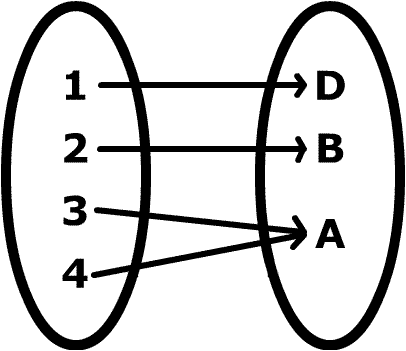

The above image (taken from [here](https://math.stackexchange.com/questions/179625/surjective-and-injective-functions)) is a visual example of the idea of "mapping" elements from one domain to another. As you can see, because there are more elements on the left (the domain), it is necessarily the case that some elements on the right (co-domain) are going to be mapped to by more than one element.